In [1]:
# pip install seaborn

In [2]:
# import necessary modules to run code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats

In [3]:
#importing secchi data files
file_path = '/home/jovyan/EmmaIacono/194903-202105_Cast_nccsv.csv'
secchi= pd.read_csv(file_path, skiprows = 218, low_memory= False)
#file contains metadata row 1-219
#so we are skipping indices 0-218

# Create a new dataframe called df so that we can add a new 'Distance_with_*' column
# Filter data by year
df = secchi[secchi['Year']>2006]
df['Distance_with_*'] = df['Distance'] * -1.852

# Create a new dataframe that contains all the columns where distance_with_* is less than equal to 150
df_inshore = df[(df['Distance_with_*']<=150)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 450
df_offshore = df[(df['Distance_with_*']>450)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 150 and less than/ equal to 450
cond1 = df['Distance_with_*']<=450
cond2 = df['Distance_with_*']>150
df_transition = df[cond1 & cond2]



### In shore ###

# Group filtered data by year
df_inshore_year = df_inshore.groupby('Year')

# Calculate median of secchi data by year
df_inshore_secchi_median = df_inshore_year.Secchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
inshore_N = df_inshore_year.Secchi.count().values

# Plot x versus y
x_inshore = df.Year.unique()
y_inshore = df_inshore_year.Secchi.median()
y_inshore_std_error = df_inshore_year.Secchi.std()/np.sqrt(inshore_N)



### Transition shore ###

# Group filtered data by year
df_transition_year = df_transition.groupby('Year')

# Calculate median of secchi data by year
df_transition_secchi_median = df_transition_year.Secchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
transition_N = df_transition_year.Secchi.count().values

# Plot x versus y
x_transition = df.Year.unique()
y_transition = df_transition_year.Secchi.median()   
y_transition_std_error = df_transition_year.Secchi.std()/np.sqrt(transition_N)



### Off shore ###

# Group filtered data by year
df_offshore_year = df_offshore.groupby('Year')
                                                                                                                                                                                                                            
# Calculate median of secchi data by year
df_offshore_secchi_median = df_offshore_year.Secchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
offshore_N = df_offshore_year.Secchi.count().values

# Plot x versus y
x_offshore = df_year_values
y_offshore = df_offshore_year.Secchi.median()
y_offshore_std_error = df_offshore_year.Secchi.std()/(np.sqrt(offshore_N))


/tmp/ipykernel_640/1011526322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance_with_*'] = df['Distance'] * -1.852


In [4]:
# ### Plotting ###

# inshore = sns.regplot(x=x_inshore, 
#                       y=y_inshore, 
#                       scatter_kws={"color": "darkslateblue"}, 
#                       line_kws={"color": "aquamarine"},
#                       marker = '*')

# transition = sns.regplot(x=x_transition, 
#                       y=y_transition, 
#                       scatter_kws={"color": "orange"}, 
#                       line_kws={"color": "aquamarine"},
#                          marker = '>')

# offshore = sns.regplot(x=x_offshore, 
#                       y=y_offshore, 
#                       scatter_kws={"color": "green"}, 
#                       line_kws={"color": "aquamarine"},
#                        marker = '.')



# chart = sns.regplot(x=x, y=y, 
#                     scatter_kws={"color": "darkslateblue"}, 
#                     line_kws={"color": "aquamarine"})

# reg_line_xarray = chart.get_lines()[0].get_xdata()
# reg_line_yarray= chart.get_lines()[0].get_ydata()
# print('Slope: ', (reg_line_yarray[1]-reg_line_yarray[0])/(reg_line_xarray[1]-reg_line_xarray[0]))
# print('Intercept: ', reg_line_yarray[0]+ 0.081*reg_line_xarray[0])
# # chart.text(1969,57,'y = -0.0807x + 181.3705', style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})

# chart.set_title('Secchi Disk Depth: 1969-2021', fontdict={'size': 15, 'weight': 'bold'})

# chart.set_xlabel('Year', fontdict={'size': 12})
# chart.set_ylabel('Secchi Depth (meters)', fontdict={'size': 12})

plt.show()
# fig = chart.get_figure()
# fig.savefig('./figures/secchi_disk_median1.png')

# chart.set_title('Secchi Disk Depth: 1969-2021', fontdict={'size': 15, 'weight': 'heavy', 'family':'Sans-serif'})
# chart.set_xlabel('Year', fontdict={'size': 12, 'family':'sans-serif'})
# chart.set_ylabel('Secchi Depth (meters)', fontdict={'size': 12, 'family':'sans-serif'})
# plt.show()

In [5]:
### Upgrade Seaborn library, dependancies = NumPY, Pandas, Matplotlib
# !python -m pip uninstall seaborn --yes
#pip install git+https://github.com/mwaskom/seaborn.git

In [6]:
# pip install seaborn

<Axes: xlabel='x_inshore', ylabel='y_inshore'>

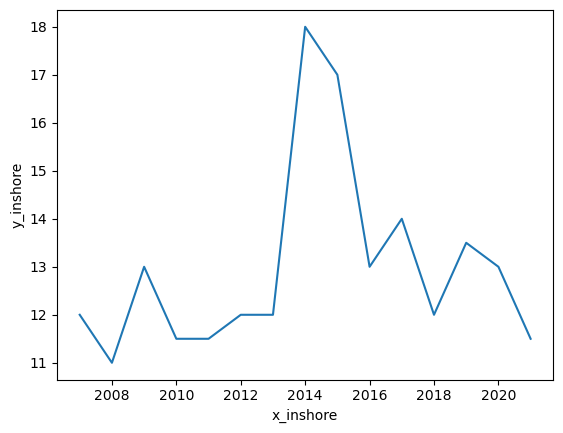

In [7]:
#  Create an empty dataframe with column names: x_inshore, y_inshore
# index --> length of the data values
df_lineplot = pd.DataFrame(index=range(len(x_inshore)), columns=['x_inshore', 'y_inshore'])

# Check type of x_inshore and y_inshore
type(x_inshore) ## Type numpy array
type(y_inshore) ## Type pandas series, i.e., column of a dataframe

# Converting x_inshore array to type pandas series
df_lineplot['x_inshore'] = pd.Series(x_inshore)

# y_inshore is indexed by year because we grouped it by year. That's why we are only extracting the y_inshore values
y_inshore.values ## Type array

# Converting y_inshore.values array to type pandas series
df_lineplot['y_inshore'] = pd.Series(y_inshore.values)

# Plot lineplot
sns.lineplot(data=df_lineplot, x='x_inshore', y='y_inshore')

<Axes: xlabel='x_inshore', ylabel='y_inshore'>

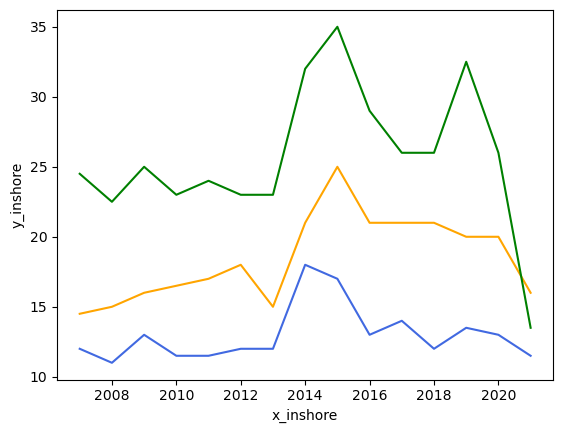

In [8]:
#  Create an empty dataframe with column names: x_inshore, y_inshore
# index --> length of the data values
df_lineplot = pd.DataFrame(index=range(len(x_inshore)), columns=['x_inshore', 'y_inshore', 'y_transition', 'y_offshore'])

# Check type of x_inshore and y_inshore
type(x_inshore) ## Type numpy array
type(y_inshore) ## Type pandas series, i.e., column of a dataframe

# Converting x_inshore array to type pandas series
df_lineplot['x_inshore'] = pd.Series(x_inshore)

# y_inshore is indexed by year because we grouped it by year. That's why we are only extracting the y_inshore values
y_inshore.values ## Type array

# Converting y_inshore.values array to type pandas series
df_lineplot['y_inshore'] = pd.Series(y_inshore.values)
df_lineplot['y_transition'] = pd.Series(y_transition.values)
df_lineplot['y_offshore'] = pd.Series(y_offshore.values)

df_lineplot
# # Plot lineplot
sns.lineplot(data=df_lineplot, x='x_inshore', y='y_inshore', color = 'royalblue')
sns.lineplot(data=df_lineplot, x='x_inshore', y='y_transition', color = 'orange')
sns.lineplot(data=df_lineplot, x='x_inshore', y='y_offshore', color = 'green')

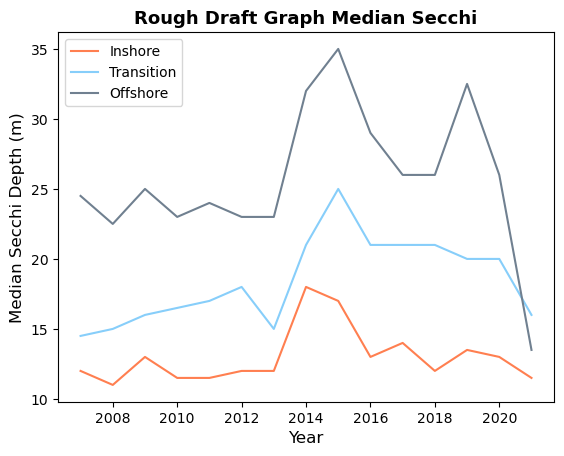

In [9]:
#  Create an empty dataframe with column names: x_inshore, y_inshore
# index --> length of the data values
df_lineplot = pd.DataFrame(index=range(len(x_inshore)), columns=['x_inshore', 'y_inshore', 'y_transition', 'y_offshore'])

# Check type of x_inshore and y_inshore
type(x_inshore) ## Type numpy array
type(y_inshore) ## Type pandas series, i.e., column of a dataframe

# Converting x_inshore array to type pandas series
df_lineplot['x_inshore'] = pd.Series(x_inshore)

# y_inshore is indexed by year because we grouped it by year. That's why we are only extracting the y_inshore values
y_inshore.values ## Type array

# Converting y_inshore.values array to type pandas series
df_lineplot['y_inshore'] = pd.Series(y_inshore.values)
df_lineplot['y_transition'] = pd.Series(y_transition.values)
df_lineplot['y_offshore'] = pd.Series(y_offshore.values)

#calculating the standard error for each year
# df_SE = pd.DataFrame(index=range(len(x_inshore)), columns=['x_inshore', 'y_inshore', 'y_transition', 'y_offshore'], )


df_lineplot
# # Plot lineplot
chart = sns.lineplot(data=df_lineplot, x='x_inshore', y='y_inshore', color = 'coral', errorbar=('se'), err_style='bars', legend='auto',err_kws=None)
chart = sns.lineplot(data=df_lineplot, x='x_inshore', y='y_transition', color = 'lightskyblue', errorbar=('se'), err_style='bars', legend='auto', err_kws=None)
chart = sns.lineplot(data=df_lineplot, x='x_inshore', y='y_offshore', color = 'slategrey', errorbar=('se'), err_style='bars', legend='auto', err_kws=None)

chart.set_title(('Rough Draft Graph Median Secchi'), 
fontdict= {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})
chart.set_xlabel(('Year'),fontdict= {'size': 12, 'family': 'Sans-serif', 'weight': 'normal'})
chart.set_ylabel(('Median Secchi Depth (m)'), fontdict= {'size': 12, 'family': 'Sans-serif', 'weight': 'normal'})
plt.legend(labels=['Inshore','Transition','Offshore'])

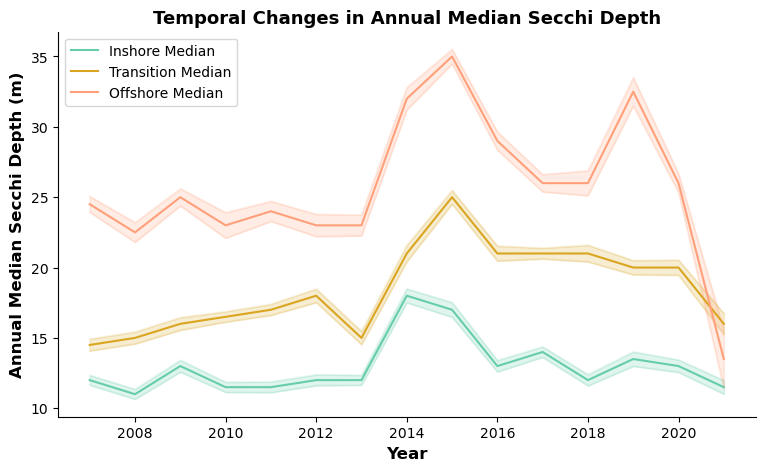

In [10]:
### Inshore ###
# Centering error around median
error_1 = 0.5*y_inshore_std_error 
lower_1 = df_inshore_secchi_median - error_1
upper_1 = df_inshore_secchi_median + error_1

x = df_year_values
y_inshore_median = df_inshore_secchi_median

### Transition ###
#Centering error around median
error_2 = 0.5*y_transition_std_error 
lower_2 = df_transition_secchi_median - error_2
upper_2 = df_transition_secchi_median + error_2

x = df_year_values
y_transition_median = df_transition_secchi_median

### Offshore ###
# Centering error around median
error_3 = 0.5*y_offshore_std_error 
lower_3 = df_offshore_secchi_median - error_3
upper_3 = df_offshore_secchi_median + error_3

x = df_year_values
y_offshore_median = df_offshore_secchi_median


### Plotting ###

# Draw plot with error band and extra formatting to match seaborn style
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(x, y_inshore_median, label='Inshore Median', color='mediumaquamarine')
ax.plot(x, lower_1, color='mediumaquamarine', alpha=0.1)
ax.plot(x, upper_1, color='mediumaquamarine', alpha=0.1)
ax.fill_between(x, lower_1, upper_1, color='mediumaquamarine', alpha=0.2)

ax.plot(x, y_transition_median, label='Transition Median', color='goldenrod')
ax.plot(x, lower_2, color='goldenrod', alpha=0.1)
ax.plot(x, upper_2, color='goldenrod', alpha=0.1)
ax.fill_between(x, lower_2, upper_2, color='goldenrod', alpha=0.2)

ax.plot(x, y_offshore_median, label='Offshore Median', color='lightsalmon')
ax.plot(x, lower_3, color='lightsalmon', alpha=0.1)
ax.plot(x, upper_3, color='lightsalmon', alpha=0.1)
ax.fill_between(x, lower_3, upper_3, color='lightsalmon', alpha=0.2)

ax.legend()
# ax.legend(labels=['Inshore','Transition','Offshore'])
ax.set_xlabel(('Year'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel(('Annual Median Secchi Depth (m)'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(('Temporal Changes in Annual Median Secchi Depth'), fontdict = {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})


plt.show()
fig = ax.get_figure()
fig.savefig('./figures/median_Secchi_depth.png')

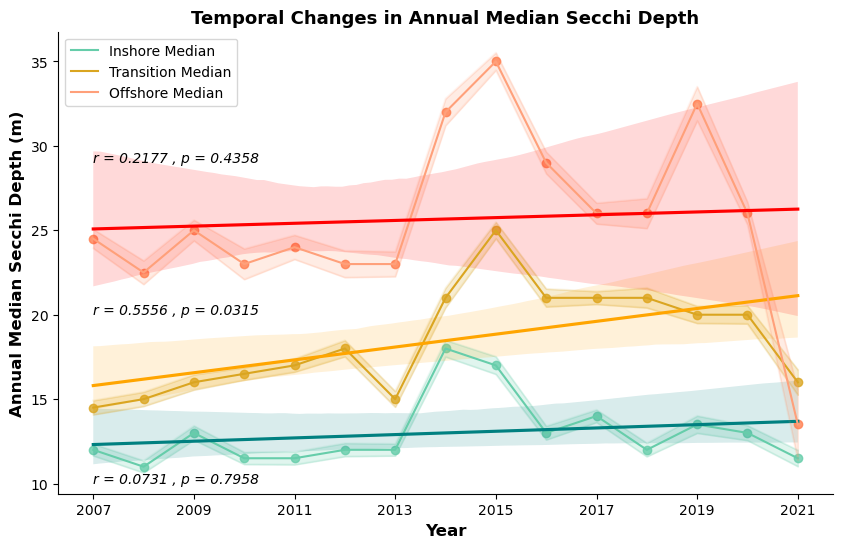

Pearson Results:  [PearsonRResult(statistic=0.21767885798357306, pvalue=0.4357778265652458), PearsonRResult(statistic=0.5555824416651016, pvalue=0.03153530163889393), PearsonRResult(statistic=0.0730768121531815, pvalue=0.7957765342661596)]


In [11]:
### Regression Plots & Pearson Coefficients for Median Secchi Depth ###

# Draw plot with error band and extra formatting to match seaborn style
fig, ax = plt.subplots(figsize=(10,6))

## Inhsore ##
ax.plot(x, y_inshore_median, label='Inshore Median', color='mediumaquamarine')
ax.plot(x, lower_1, color='mediumaquamarine', alpha=0.1)
ax.plot(x, upper_1, color='mediumaquamarine', alpha=0.1)
ax.fill_between(x, lower_1, upper_1, color='mediumaquamarine', alpha=0.2)

chart = sns.regplot(x=x, y=y_inshore_median, scatter_kws={"color": "mediumaquamarine"}, line_kws={"color": "teal"}) 

stat_inshore = stats.pearsonr(x, y_inshore_median)  # Calculating Pearson Coefficients

chart_text = 'r = ' + str(round(stat_inshore[0],4)) + ' , ' + 'p = ' + str(round(stat_inshore[1],4))
chart.text(2007,29, chart_text, style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})

## Transition ##
ax.plot(x, y_transition_median, label='Transition Median', color='goldenrod')
ax.plot(x, lower_2, color='goldenrod', alpha=0.1)
ax.plot(x, upper_2, color='goldenrod', alpha=0.1)
ax.fill_between(x, lower_2, upper_2, color='goldenrod', alpha=0.2)

chart = sns.regplot(x=x, y=y_transition_median, scatter_kws={"color": "goldenrod"}, line_kws={"color": "orange"}) 

stat_transition = stats.pearsonr(x, y_transition_median)  # Calculating Pearson Coefficients

chart_text = 'r = ' + str(round(stat_transition[0],4)) + ' , ' + 'p = ' + str(round(stat_transition[1],4))
chart.text(2007,20, chart_text, style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})

## Offhsore ##
ax.plot(x, y_offshore_median, label='Offshore Median', color='lightsalmon')
ax.plot(x, lower_3, color='lightsalmon', alpha=0.1)
ax.plot(x, upper_3, color='lightsalmon', alpha=0.1)
ax.fill_between(x, lower_3, upper_3, color='lightsalmon', alpha=0.2)

chart = sns.regplot(x=x, y=y_offshore_median, scatter_kws={"color": "coral"}, line_kws={"color": "red"}) 

stat_offshore = stats.pearsonr(x, y_offshore_median)  # Calculating Pearson Coefficients

chart_text = 'r = ' + str(round(stat_offshore[0],4)) + ' , ' + 'p = ' + str(round(stat_offshore[1],4))
chart.text(2007,10, chart_text, style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})


## Plotting ##
ax.legend()
# ax.legend(labels=['Inshore','Transition','Offshore'])
ax.set_xlabel(('Year'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel(('Annual Median Secchi Depth (m)'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(('Temporal Changes in Annual Median Secchi Depth'), fontdict = {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})
ax.set_xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]) 



plt.show()
fig = ax.get_figure()
fig.savefig('./figures/median_Secchi_depth_regression.png')

stat_coeff = [stat_inshore, stat_transition, stat_offshore]
print('Pearson Results: ', stat_coeff)

# coeff_inshore = stat_inshore[0]
# p_value_inshore = stat_inshore[1]

## 1. Add this text on the graph
## 2. Do the same thing for reciprocal 
## 3. Make boxplot pretty


In [12]:
# ### Inshore ###
# # Centering error around median
# error_1 = 0.5*y_inshore_std_error 
# lower_1 = 1/df_inshore_secchi_median - error_1
# upper_1 = 1/df_inshore_secchi_median + error_1

# x = df_year_values
# y_inshore_median = df_inshore_secchi_median

# ### Transition ###
# #Centering error around median
# error_2 = 0.5*y_transition_std_error 
# lower_2 = df_transition_secchi_median - error_2
# upper_2 = df_transition_secchi_median + error_2

# x = df_year_values
# y_transition_median = df_transition_secchi_median

# ### Offshore ###
# # Centering error around median
# error_3 = 0.5*y_offshore_std_error 
# lower_3 = df_offshore_secchi_median - error_3
# upper_3 = df_offshore_secchi_median + error_3

# x = df_year_values
# y_offshore_median = df_offshore_secchi_median


# ### Plotting ###

# # Draw plot with error band and extra formatting to match seaborn style
# fig, ax = plt.subplots(figsize=(9,5))

# ax.plot(x, 1/y_inshore_median, label='Inshore Median', color='purple')
# ax.plot(x, lower_1, color='purple', alpha=0.1)
# ax.plot(x, upper_1, color='purple', alpha=0.1)
# ax.fill_between(x, lower_1, upper_1, color='purple', alpha=0.2)

# ax.plot(x, 1/y_transition_median, label='Transition Median', color='orange')
# # ax.plot(x, lower_2, color='tab:orange', alpha=0.1)
# # ax.plot(x, upper_2, color='tab:orange', alpha=0.1)
# # ax.fill_between(x, lower_2, upper_2, color='orange', alpha=0.2)

# ax.plot(x, 1/y_offshore_median, label='Offshore Median', color='tab:green')
# # ax.plot(x, lower_3, color='tab:green', alpha=0.1)
# # ax.plot(x, upper_3, color='tab:green', alpha=0.1)
# # ax.fill_between(x, lower_3, upper_3, color='green', alpha=0.2)

# ax.legend()
# # ax.legend(labels=['Inshore','Transition','Offshore'])
# ax.set_xlabel(('Year'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
# ax.set_ylabel(('Annual Median Secchi Depth (m)'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_title(('Temporal Changes in Annual Median Secchi Depth'), fontdict = {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})


# plt.show()
# # fig = chart.get_figure()
# # fig.savefig('./figures/median_secchi_depth.png')

/tmp/ipykernel_640/330367077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inshore['ReciprocalSecchi'] = 1/df_inshore.Secchi
/tmp/ipykernel_640/330367077.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transition['ReciprocalSecchi'] = 1/df_transition.Secchi
/tmp/ipykernel_640/330367077.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

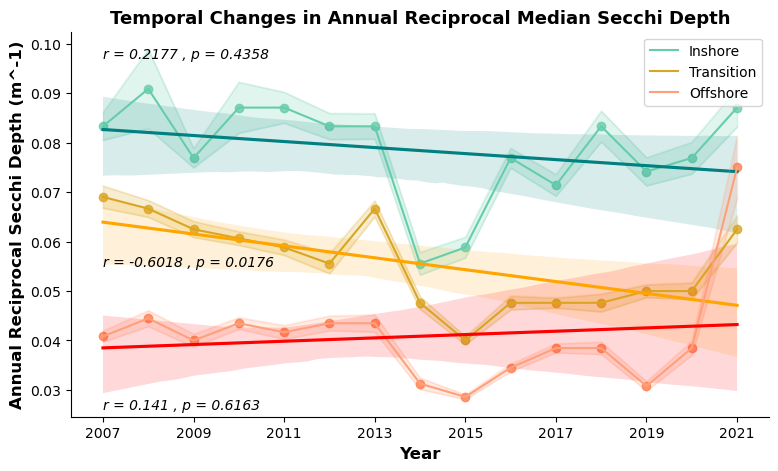

Pearson Results:  [PearsonRResult(statistic=0.21767885798357306, pvalue=0.4357778265652458), PearsonRResult(statistic=-0.6017660005110409, pvalue=0.017625867199121754), PearsonRResult(statistic=0.14096978110477723, pvalue=0.6162846324768457)]


In [13]:
## Reciprocal Median Secchi Depth Graph ###

### Inshore ###

# Invert Secchi depth data
df_inshore['ReciprocalSecchi'] = 1/df_inshore.Secchi

df_inshore.ReciprocalSecchi


# Group filtered data by year
df_inshore_year = df_inshore.groupby('Year')

# Calculate median of reciprocal secchi data by year
df_inshore_secchi_median = df_inshore_year.ReciprocalSecchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
inshore_N = df_inshore_year.Secchi.count().values

# Plot x versus y
x_inshore = df_year_values
y_inshore = df_inshore_year.ReciprocalSecchi.median()
y_inshore_std_error = df_inshore_year.ReciprocalSecchi.std()/(np.sqrt(inshore_N))

# Centering error around median
error_1 = 0.5*y_inshore_std_error 
lower_1 = df_inshore_secchi_median - error_1
upper_1 = df_inshore_secchi_median + error_1

x = df_year_values
y_inshore_median = df_inshore_secchi_median




### Transition ###

# Invert Secchi depth data
df_transition['ReciprocalSecchi'] = 1/df_transition.Secchi

df_transition.ReciprocalSecchi


# Group filtered data by year
df_transition_year = df_transition.groupby('Year')

# Calculate median of reciprocal secchi data by year
df_transition_secchi_median = df_transition_year.ReciprocalSecchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
transition_N = df_transition_year.Secchi.count().values

# Plot x versus y
x_transition = df_year_values
y_transition = df_transition_year.ReciprocalSecchi.median()
y_transition_std_error = df_transition_year.ReciprocalSecchi.std()/(np.sqrt(transition_N))

# Centering error around median
error_2 = 0.5*y_transition_std_error 
lower_2 = df_transition_secchi_median - error_2
upper_2 = df_transition_secchi_median + error_2

x = df_year_values
y_transition_median = df_transition_secchi_median



### Offshore ###

# Invert Secchi depth data
df_offshore['ReciprocalSecchi'] = 1/df_offshore.Secchi

df_offshore.ReciprocalSecchi


# Group filtered data by year
df_offshore_year = df_offshore.groupby('Year')

# Calculate median of reciprocal secchi data by year
df_offshore_secchi_median = df_offshore_year.ReciprocalSecchi.median()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
offshore_N = df_offshore_year.Secchi.count().values

# Plot x versus y
x_offshore = df_year_values
y_offshore = df_offshore_year.ReciprocalSecchi.median()
y_offshore_std_error = df_offshore_year.ReciprocalSecchi.std()/(np.sqrt(offshore_N))

# Centering error around median
error_3 = 0.5*y_offshore_std_error 
lower_3 = df_offshore_secchi_median - error_3
upper_3 = df_offshore_secchi_median + error_3

x = df_year_values
y_offshore_median = df_offshore_secchi_median



### Plotting ###

# Draw plot with error band and extra formatting to match seaborn style
fig, ax = plt.subplots(figsize=(9,5))

## Inshore plot
ax.plot(x, y_inshore_median, label='Inshore', color='mediumaquamarine')
ax.plot(x, lower_1, color='mediumaquamarine', alpha=0.1)
ax.plot(x, upper_1, color='mediumaquamarine', alpha=0.1)
ax.fill_between(x, lower_1, upper_1, color= 'mediumaquamarine', alpha=0.2)

chart = sns.regplot(x=x, y=y_inshore_median, scatter_kws={"color": "mediumaquamarine"}, line_kws={"color": "teal"}) 

stat_inshore_reciprocal = stats.pearsonr(x, y_inshore_median)  # Calculating Pearson Coefficients

chart_text = 'r = ' + str(round(stat_inshore[0],4)) + ' , ' + 'p = ' + str(round(stat_inshore[1],4))
chart.text(2007,0.097, chart_text, style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})

## Transition plot
ax.plot(x, y_transition_median, label='Transition', color='goldenrod')
ax.plot(x, lower_2, color='goldenrod', alpha=0.1)
ax.plot(x, upper_2, color='goldenrod', alpha=0.1)
ax.fill_between(x, lower_2, upper_2, color='goldenrod', alpha=0.2)

chart = sns.regplot(x=x, y=y_transition_median, scatter_kws={"color": "goldenrod"}, line_kws={"color": "orange"}) 

stat_transition = stats.pearsonr(x, y_transition_median)  # Calculating Pearson Coefficients

chart_text = 'r = ' + str(round(stat_transition[0],4)) + ' , ' + 'p = ' + str(round(stat_transition[1],4))
chart.text(2007,0.055, chart_text, style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})

## Offshore plot
ax.plot(x, y_offshore_median, label='Offshore', color='lightsalmon')
ax.plot(x, lower_3, color='lightsalmon', alpha=0.1)
ax.plot(x, upper_3, color='lightsalmon', alpha=0.1)
ax.fill_between(x, lower_3, upper_3, color = 'lightsalmon', alpha=0.2)

chart = sns.regplot(x=x, y=y_offshore_median, scatter_kws={"color": "coral"}, line_kws={"color": "red"}) 

stat_offshore = stats.pearsonr(x, y_offshore_median)  # Calculating Pearson Coefficients

chart_text = 'r = ' + str(round(stat_offshore[0],4)) + ' , ' + 'p = ' + str(round(stat_offshore[1],4))
chart.text(2007,0.026, chart_text, style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})


## Titles and such
ax.legend()
plt.legend(loc='upper right')
# ax.legend(labels=['Inshore','Transition','Offshore'])
ax.set_xlabel(('Year'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel(('Annual Reciprocal Secchi Depth (m^-1)'), fontdict = {'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title(('Temporal Changes in Annual Reciprocal Median Secchi Depth'), fontdict = {'size': 13, 'family': 'Sans-serif', 'weight': 'bold'})
ax.set_xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]) 


plt.show()
fig = ax.get_figure()
fig.savefig('./figures/Reciprocal_Median_Secchi_depth_Regression.png')

stat_coeff = [stat_inshore, stat_transition, stat_offshore]
print('Pearson Results: ', stat_coeff)